<a href="https://colab.research.google.com/github/KarimaAL/depth-hints/blob/master/Copie_de_not_for_commercial_purposes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import absolute_import, division, print_function
%matplotlib inline

import os
import numpy as np
import PIL.Image as pil
import matplotlib.pyplot as plt

import torch
from torchvision import transforms

import networks
from utils import download_model_if_doesnt_exist

In [0]:
model_name = "mono_640x192"

download_model_if_doesnt_exist(model_name)
encoder_path = os.path.join("models", model_name, "encoder.pth")
depth_decoder_path = os.path.join("models", model_name, "depth.pth")

# LOADING PRETRAINED MODEL
encoder = networks.ResnetEncoder(18, False)
depth_decoder = networks.DepthDecoder(num_ch_enc=encoder.num_ch_enc, scales=range(4))

loaded_dict_enc = torch.load(encoder_path, map_location='cpu')
filtered_dict_enc = {k: v for k, v in loaded_dict_enc.items() if k in encoder.state_dict()}
encoder.load_state_dict(filtered_dict_enc)

loaded_dict = torch.load(depth_decoder_path, map_location='cpu')
depth_decoder.load_state_dict(loaded_dict)

encoder.eval()
depth_decoder.eval();

In [0]:
image_path = "/content/assets/test_image.jpg"


input_image = pil.open(image_path).convert('RGB')
original_width, original_height = input_image.size

feed_height = loaded_dict_enc['height']
feed_width = loaded_dict_enc['width']
input_image_resized = input_image.resize((feed_width, feed_height), pil.LANCZOS)

input_image_pytorch = transforms.ToTensor()(input_image_resized).unsqueeze(0)

In [0]:
with torch.no_grad():
    features = encoder(input_image_pytorch)
    outputs = depth_decoder(features)

disp = outputs[("disp", 0)]

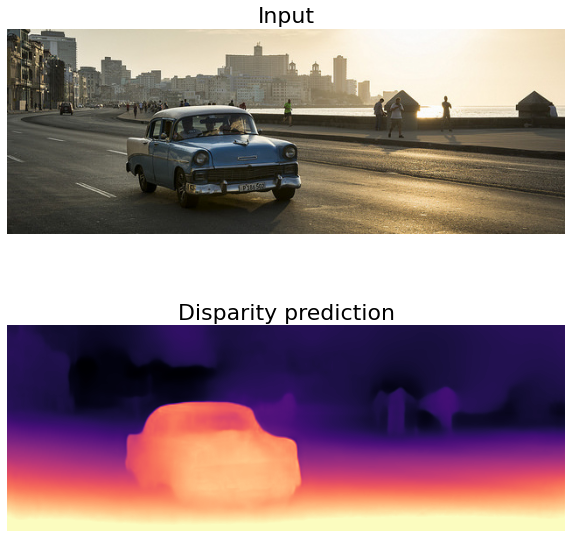

In [0]:
disp_resized = torch.nn.functional.interpolate(disp,
    (original_height, original_width), mode="bilinear", align_corners=False)

# Saving colormapped depth image
disp_resized_np = disp_resized.squeeze().cpu().numpy()
vmax = np.percentile(disp_resized_np, 95)

plt.figure(figsize=(10, 10))
plt.subplot(211)
plt.imshow(input_image)
plt.title("Input", fontsize=22)
plt.axis('off')

plt.subplot(212)
plt.imshow(disp_resized_np, cmap='magma', vmax=vmax)
plt.title("Disparity prediction", fontsize=22)
plt.axis('off');
# import cv2
# plt.imshow(disp_resized_np)
# plt.show()
# cv2.imwrite('disparityVE1.png',disp_resized_np)

In [0]:
#testing on other images:
image_path = "/content/assets/5.jpg"


input_image = pil.open(image_path).convert('RGB')
original_width, original_height = input_image.size

feed_height = loaded_dict_enc['height']
feed_width = loaded_dict_enc['width']
input_image_resized = input_image.resize((feed_width, feed_height), pil.LANCZOS)

input_image_pytorch = transforms.ToTensor()(input_image_resized).unsqueeze(0)

In [0]:
with torch.no_grad():
    features = encoder(input_image_pytorch)
    outputs = depth_decoder(features)

disp = outputs[("disp", 0)]

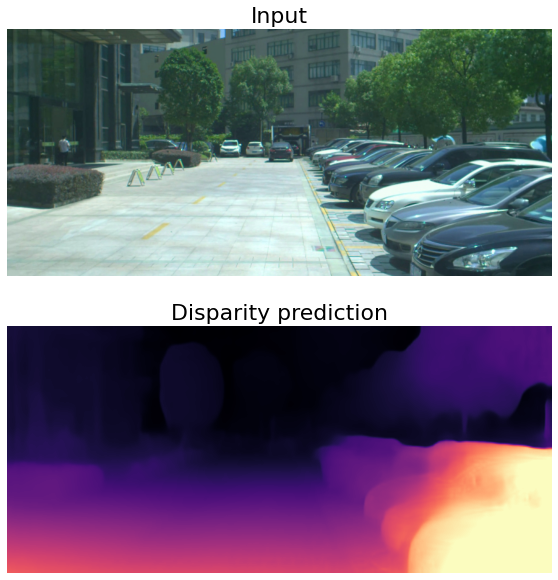

In [0]:
disp_resized = torch.nn.functional.interpolate(disp,
    (original_height, original_width), mode="bilinear", align_corners=False)

# Saving colormapped depth image
disp_resized_np = disp_resized.squeeze().cpu().numpy()
vmax = np.percentile(disp_resized_np, 95)

plt.figure(figsize=(10, 10))
plt.subplot(211)
plt.imshow(input_image)
plt.title("Input", fontsize=22)
plt.axis('off')

plt.subplot(212)
plt.imshow(disp_resized_np, cmap='magma', vmax=vmax)
plt.title("Disparity prediction", fontsize=22)
plt.axis('off');

In [0]:
#testing of=n other images:
image_path = "/content/assets/13.jpg"


input_image = pil.open(image_path).convert('RGB')
original_width, original_height = input_image.size

feed_height = loaded_dict_enc['height']
feed_width = loaded_dict_enc['width']
input_image_resized = input_image.resize((feed_width, feed_height), pil.LANCZOS)

input_image_pytorch = transforms.ToTensor()(input_image_resized).unsqueeze(0)

In [0]:
with torch.no_grad():
    features = encoder(input_image_pytorch)
    outputs = depth_decoder(features)

disp = outputs[("disp", 0)]

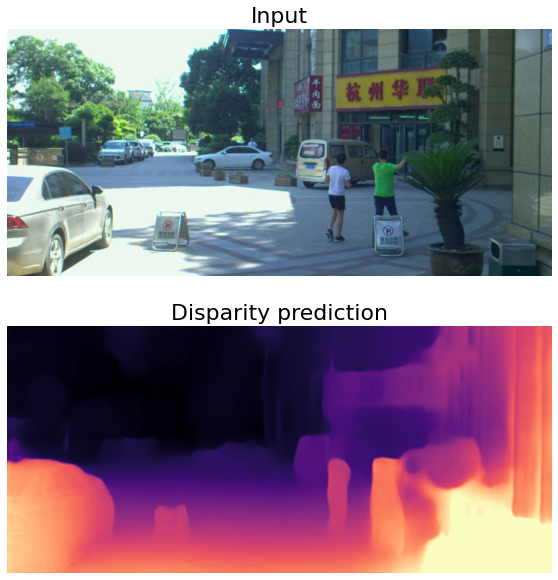

In [0]:
disp_resized = torch.nn.functional.interpolate(disp,
    (original_height, original_width), mode="bilinear", align_corners=False)

# Saving colormapped depth image
disp_resized_np = disp_resized.squeeze().cpu().numpy()
vmax = np.percentile(disp_resized_np, 95)

plt.figure(figsize=(10, 10))
plt.subplot(211)
plt.imshow(input_image)
plt.title("Input", fontsize=22)
plt.axis('off')

plt.subplot(212)
plt.imshow(disp_resized_np, cmap='magma', vmax=vmax)
plt.title("Disparity prediction", fontsize=22)
plt.axis('off');

(375, 1242)
float32


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:64: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


(-0.5, 1241.5, 374.5, -0.5)

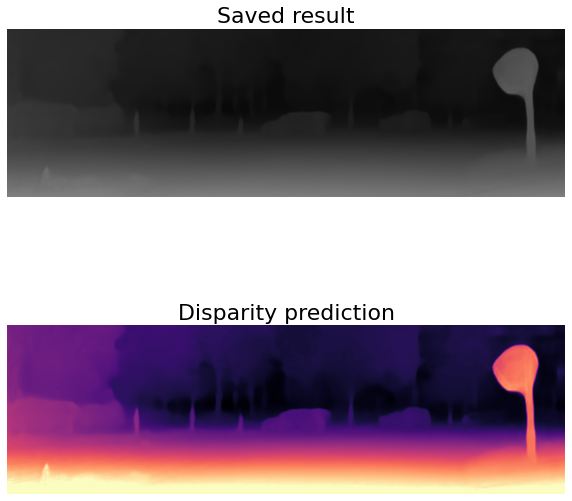

In [0]:
#testing of=n other images:

from PIL import Image

image_path = "/content/assets/000000_13.png"


input_image = pil.open(image_path).convert('RGB')
original_width, original_height = input_image.size

input_image     = input_image.rotate(0)

feed_height = loaded_dict_enc['height']
feed_width = loaded_dict_enc['width']
input_image_resized = input_image.resize((feed_width, feed_height), pil.LANCZOS)

input_image_pytorch = transforms.ToTensor()(input_image_resized).unsqueeze(0)



with torch.no_grad():
    features = encoder(input_image_pytorch)
    outputs = depth_decoder(features)

disp = outputs[("disp", 0)]





disp_resized = torch.nn.functional.interpolate(disp,
    (original_height, original_width), mode="bilinear", align_corners=False)


# Saving colormapped depth image
disp_resized_np = disp_resized.squeeze().cpu().numpy()
vmax = np.percentile(disp_resized_np, 95)
print(disp_resized_np.shape)
print(disp_resized_np.dtype)

plt.figure(figsize=(10, 10))
plt.subplot(211)
plt.imshow(input_image)
plt.title("Input", fontsize=22)
plt.axis('off')

plt.subplot(212)
plt.imshow(disp_resized_np, cmap='magma', vmax=vmax)
#plt.imshow(disp_resized_np)
plt.title("Disparity prediction", fontsize=22)
plt.axis('off');

#concat = np.concatenate([input_image, disp_resized_np[0]], axis=1)
from skimage import img_as_ubyte
import skimage.io
skimage.io.imsave(os.path.join('/content/test',"predict.png"),img_as_ubyte(disp_resized_np))
#cv2.imwrite('/content/saved images/result1.png', cv2.cvtColor(disp_resized_np, cv2.COLOR_RGB2BGR))

# #skimage.io.imsave('/content/saved images/result1.png',disp_resized_np)
# skimage.io.imsave('/content/saved images/result13.png',cv2.cvtColor(np.float32(disp_resized_np), cv2.COLOR_RGB2BGR))

from google.colab.patches import cv2_imshow   # to show color image
imageTest=cv2.imread('/content/test/predict.png')

plt.subplot(211)
plt.imshow(imageTest)
plt.title("Saved result", fontsize=22)
plt.axis('off')


#cv2_imshow(imageTest)

(375, 1242)
float32


<function matplotlib.pyplot.show>

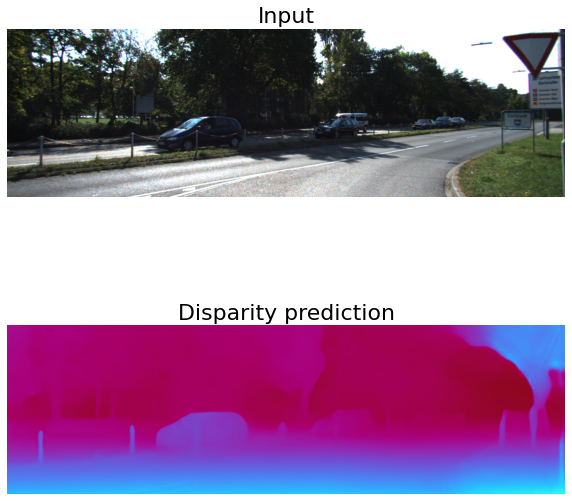

In [0]:
#testing of=n other images:

from PIL import Image

image_path = "/content/assets/000001_04.png"


input_image = pil.open(image_path).convert('RGB')
original_width, original_height = input_image.size

input_image     = input_image.rotate(0)

feed_height = loaded_dict_enc['height']
feed_width = loaded_dict_enc['width']
input_image_resized = input_image.resize((feed_width, feed_height), pil.LANCZOS)

input_image_pytorch = transforms.ToTensor()(input_image_resized).unsqueeze(0)



with torch.no_grad():
    features = encoder(input_image_pytorch)
    outputs = depth_decoder(features)

disp = outputs[("disp", 0)]





disp_resized = torch.nn.functional.interpolate(disp,
    (original_height, original_width), mode="bilinear", align_corners=False)


# Saving colormapped depth image
disp_resized_np = disp_resized.squeeze().cpu().numpy()
vmax = np.percentile(disp_resized_np, 95)
print(disp_resized_np.shape)
print(disp_resized_np.dtype)

plt.figure(figsize=(10, 10))
plt.subplot(211)
plt.imshow(input_image)
plt.title("Input", fontsize=22)
plt.axis('off')

plt.subplot(212)
plt.imshow(disp_resized_np, cmap='magma', vmax=vmax)
#plt.imshow(disp_resized_np)
plt.title("Disparity prediction", fontsize=22)
plt.axis('off');

import skimage.io

skimage.io.imsave('/content/savedcolorimages/result1.png',cv2.cvtColor(np.float32(disp_resized_np), cv2.COLOR_GRAY2BGR))

from google.colab.patches import cv2_imshow   # to show color image
imageTest=cv2.imread('/content/savedcolorimages/result1.png')
# imageTest = cv2.applyColorMap(cv2.convertScaleAbs(imageTest, alpha=1), cv2.COLORMAP_JET)
# imageTest = cv2.applyColorMap(cv2.convertScaleAbs(imageTest, alpha=1), cv2.COLORMAP_HSV)
imageTest = cv2.applyColorMap(cv2.convertScaleAbs(imageTest, alpha=1.8), cv2.COLORMAP_PLASMA)
# imageTest = cv2.applyColorMap(cv2.convertScaleAbs(imageTest, alpha=0.9), cv2.COLORMAP_RAINBOW)
# imageTest = cv2.applyColorMap(cv2.convertScaleAbs(imageTest, alpha=1.8), cv2.COLORMAP_TURBO)
cv2.imwrite('/content/saved/25.png',imageTest)
imageTRY=cv2.imread('/content/saved/25.png')
plt.imshow(imageTRY)
plt.show